In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import regionmask
import xarray as xr

In [2]:
RESULT_FILE = "probabilistic_example_emulation.nc"

In [4]:
result_lat_lon = xr.load_dataset(RESULT_FILE).set_index(z=("lat", "lon")).unstack("z")
result_lat_lon

<xarray.Dataset>
Dimensions:                 (lat: 15, lon: 19, magicc_ensemble_member: 600, realisation: 2, scenario: 8, year: 301)
Coordinates:
  * magicc_ensemble_member  (magicc_ensemble_member) int64 0 1 2 ... 597 598 599
  * scenario                (scenario) object 'ssp119' 'ssp126' ... 'ssp585'
  * realisation             (realisation) int64 0 1
  * year                    (year) int64 1850 1851 1852 1853 ... 2148 2149 2150
  * lat                     (lat) float64 -49.5 -40.5 -31.5 ... 58.5 67.5 76.5
  * lon                     (lon) float64 -162.0 -144.0 -126.0 ... 144.0 162.0
Data variables:
    tas                     (magicc_ensemble_member, scenario, realisation, year, lat, lon) float64 ...

Time-mean for different scenarios, median over all realisations and ensemble members.

Text(0.5, 0.98, '2081 - 2100 mean, median over all realisations and MAGICC ensemble members')

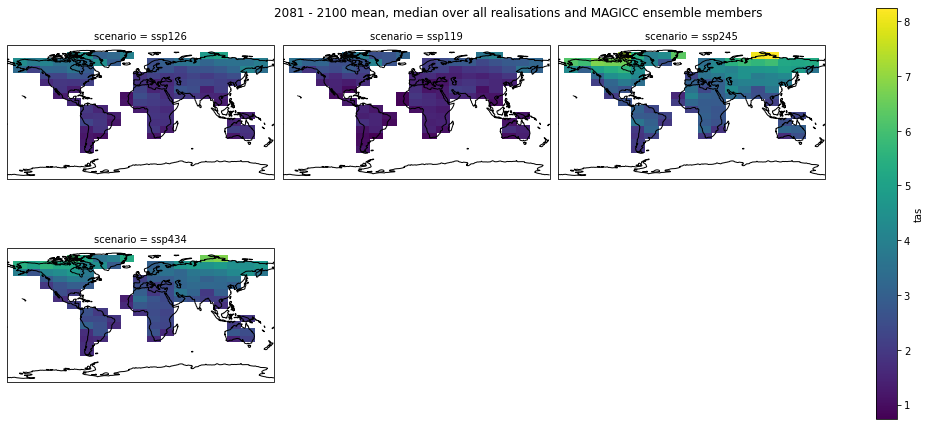

In [5]:
scenarios_to_plot = ["ssp126", "ssp119", "ssp245", "ssp434"]
year_range = range(2081, 2100 + 1)

g = (
    result_lat_lon["tas"]
    .sel(year=year_range, scenario=scenarios_to_plot)
    .mean(dim="year")
    .median(dim=["realisation", "magicc_ensemble_member"])
    .plot(
        col="scenario", 
        col_wrap=3, 
        subplot_kws={"projection": ccrs.PlateCarree()}, 
        size=3,
        aspect=1.5,
    )
)
for ax in g.axes.flat:
    ax.coastlines()
    
g.fig.suptitle("{} - {} mean, median over all realisations and MAGICC ensemble members".format(year_range[0], year_range[-1]))

Time-mean for different scenarios, maximum over all realisations.

Text(0.5, 0.98, '2081 - 2100 mean, max. over all realisations and MAGICC ensemble members')

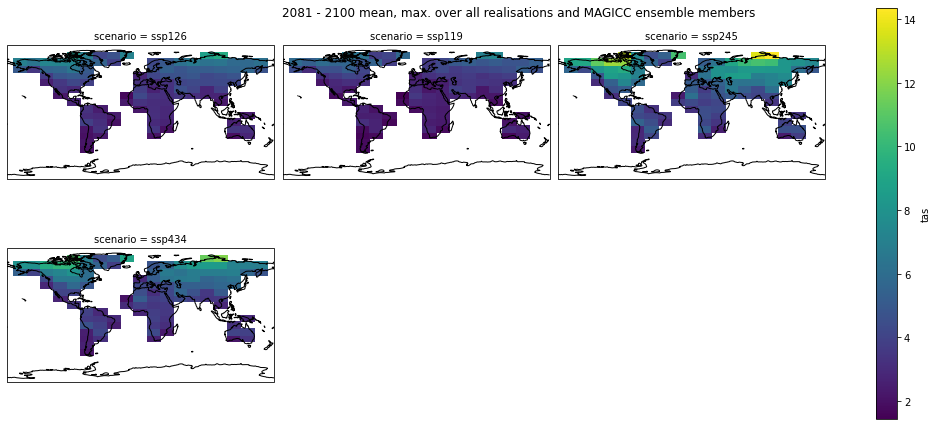

In [6]:
scenarios_to_plot = ["ssp126", "ssp119", "ssp245", "ssp434"]
year_range = range(2081, 2100 + 1)

g = (
    result_lat_lon["tas"]
    .sel(year=year_range, scenario=scenarios_to_plot)
    .mean(dim="year")
    .max(dim=["realisation", "magicc_ensemble_member"])
    .plot(
        col="scenario", 
        col_wrap=3, 
        subplot_kws={"projection": ccrs.PlateCarree()}, 
        size=3,
        aspect=1.5,
    )
)
for ax in g.axes.flat:
    ax.coastlines()
    
g.fig.suptitle("{} - {} mean, max. over all realisations and MAGICC ensemble members".format(year_range[0], year_range[-1]))

Time-mean for different scenarios, standard deviation over all realisations.

/data/ubuntu-znicholls/miniconda3/envs/mesmer-openscmrunner/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


Text(0.5, 0.98, '2081 - 2100 mean, std. over all realisations and MAGICC ensemble members')

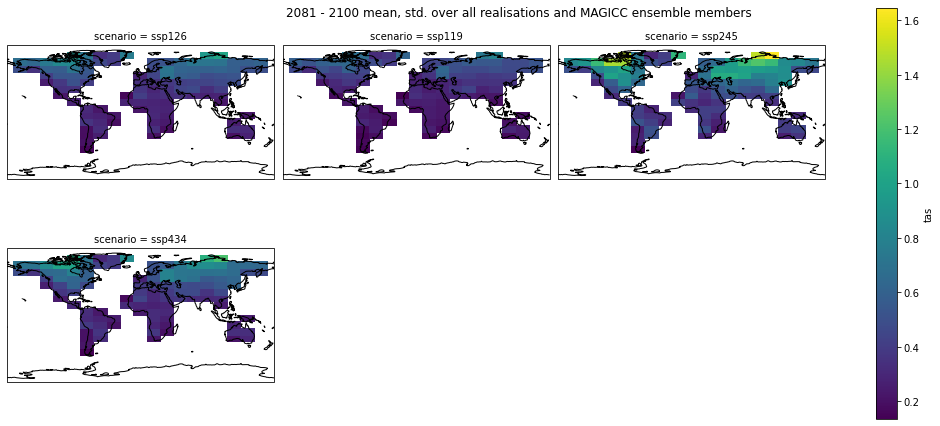

In [7]:
scenarios_to_plot = ["ssp126", "ssp119", "ssp245", "ssp434"]
year_range = range(2081, 2100 + 1)

g = (
    result_lat_lon["tas"]
    .sel(year=year_range, scenario=scenarios_to_plot)
    .mean(dim="year")
    .std(dim=["realisation", "magicc_ensemble_member"])
    .plot(
        col="scenario", 
        col_wrap=3, 
        subplot_kws={"projection": ccrs.PlateCarree()}, 
        size=3,
        aspect=1.5,
    )
)
for ax in g.axes.flat:
    ax.coastlines()
    
g.fig.suptitle("{} - {} mean, std. over all realisations and MAGICC ensemble members".format(year_range[0], year_range[-1]))

Basic weighted mean.

In [8]:
weights = np.cos(np.deg2rad(result_lat_lon["tas"].lat))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 15)>
array([0.64944805, 0.76040597, 0.85264016, 0.92387953, 0.97236992,
       0.99691733, 0.99691733, 0.97236992, 0.92387953, 0.85264016,
       0.76040597, 0.64944805, 0.52249856, 0.38268343, 0.23344536])
Coordinates:
  * lat      (lat) float64 -49.5 -40.5 -31.5 -22.5 -13.5 ... 49.5 58.5 67.5 76.5

In [9]:
global_mean = (
    result_lat_lon["tas"]
    .weighted(weights)
    .mean(dim=["lat", "lon"])
)
global_mean

<xarray.DataArray 'tas' (magicc_ensemble_member: 600, scenario: 8, realisation: 2, year: 301)>
array([[[[ 0.14045074,  0.44119312,  0.3291878 , ...,  0.95054945,
           0.66801521,  0.72216068],
         [ 0.25459639,  0.18564096, -0.108126  , ...,  1.28443455,
           0.97734755,  0.72834429]],

        [[ 0.14045074,  0.44119312,  0.3291878 , ...,  1.52684956,
           1.24658378,  1.30290408],
         [ 0.25459639,  0.18564096, -0.108126  , ...,  1.86073466,
           1.55591613,  1.30908768]],

        [[ 0.14045074,  0.44119312,  0.3291878 , ...,  3.23736714,
           2.96490761,  3.02886569],
         [ 0.25459639,  0.18564096, -0.108126  , ...,  3.57125224,
           3.27423995,  3.03504929]],

        ...,

        [[ 0.14045074,  0.44119312,  0.3291878 , ...,  4.20328661,
           3.9363448 ,  4.00573878],
         [ 0.25459639,  0.18564096, -0.108126  , ...,  4.53717171,
...
           4.27393886,  4.34216174],
         [ 0.25633162,  0.19297445, -0.09722323, ...,  4.87585192,
           4.58327121,  4.34834535]],

        ...,

        [[ 0.14218598,  0.44852661,  0.34009056, ...,  5.62329507,
           5.36310349,  5.43903098],
         [ 0.25633162,  0.19297445, -0.09722323, ...,  5.95718017,
           5.67243583,  5.44521458]],

        [[ 0.14218598,  0.44852661,  0.34009056, ...,  2.60874476,
           2.32228706,  2.37273069],
         [ 0.25633162,  0.19297445, -0.09722323, ...,  2.94262986,
           2.6316194 ,  2.37891429]],

        [[ 0.14218598,  0.44852661,  0.34009056, ..., 10.59409243,
          10.38145119, 10.50415381],
         [ 0.25633162,  0.19297445, -0.09722323, ..., 10.92797753,
          10.69078353, 10.51033741]]]])
Coordinates:
  * magicc_ensemble_member  (magicc_ensemble_member) int64 0 1 2 ... 597 598 599
  * scenario                (scenario) object 'ssp119' 'ssp126' ... 'ssp585'
  * realisation             (realisation) int64 0 1
  * year                    (year) int64 1850 1851 1852 1853 ... 2148 2149 2150

Plot median of all realisations and MAGICC ensemble members for all scenarios.

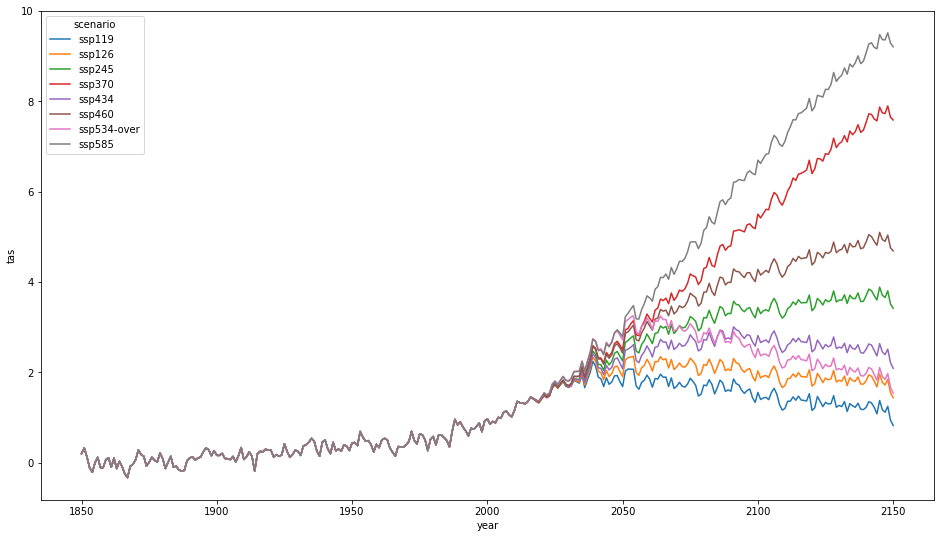

In [10]:
(
    global_mean
    .median(dim=["realisation", "magicc_ensemble_member"])
    .plot
    .line(hue="scenario", x="year", figsize=(16, 9))
)

Compare realisations for a single scenario and MAGICC ensemble member.

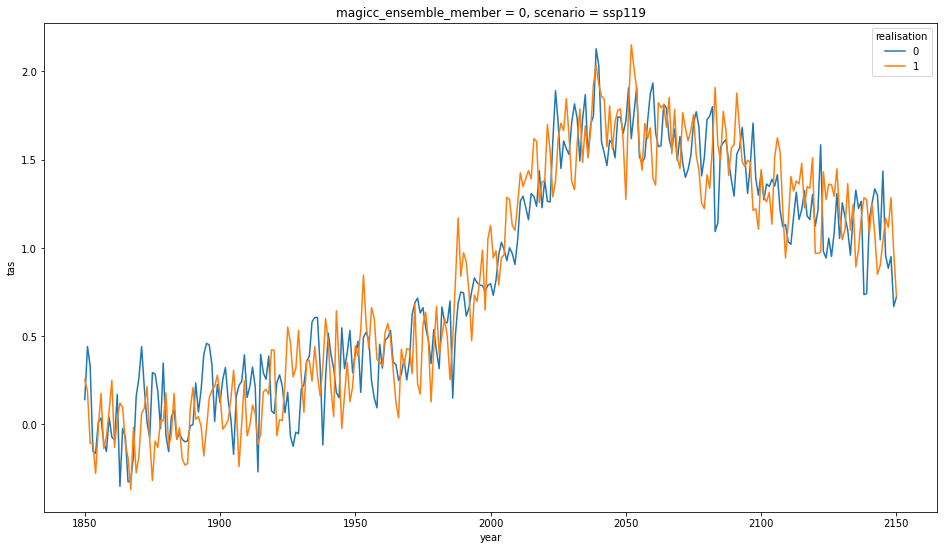

In [11]:
(
    global_mean
    .sel(scenario="ssp119", magicc_ensemble_member=0)
    .plot
    .line(hue="realisation", x="year", figsize=(16, 9))
)

Compare MAGICC ensemble members for a single scenario and realisation

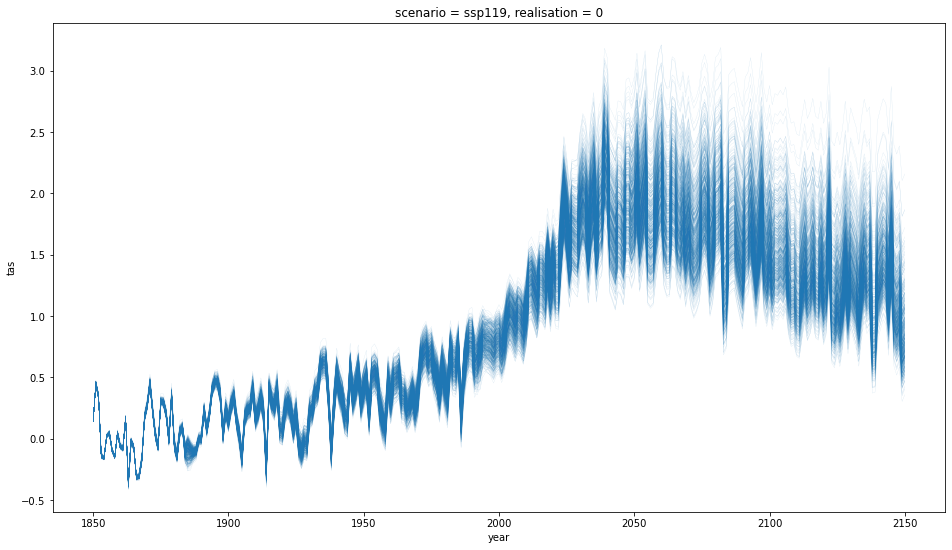

In [21]:
(
    global_mean
    .sel(scenario="ssp119", realisation=0)
    .plot
    .line(
        hue="magicc_ensemble_member", 
        x="year", 
        figsize=(16, 9), 
        add_legend=False, 
        linewidth=0.25, 
        alpha=0.2,
        color="tab:blue"
    )
);

Do some stuff with regionmask.

In [13]:
natural_earth_mask = regionmask.defined_regions.natural_earth.countries_110.mask(result_lat_lon)
natural_earth_mask

<xarray.DataArray 'region' (lat: 15, lon: 19)>
array([[ nan,  nan,  nan,  nan,  nan,   9.,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  10.,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  29.,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan, 137., 137.,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  29.,  nan,  nan,  nan,  50.,
         nan,  nan,  nan,  nan,  nan, 137., 137.,  nan],
       [ nan,  nan,  nan,  nan,  nan,  31.,  29.,  nan,  nan,  nan,  74.,
         72.,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  31.,  29.,  nan,  nan,  nan,  11.,
          1.,  nan,  nan,  nan,  nan,  nan,   7.,  nan],
       [ nan,  nan,  nan,  nan,  nan,  32.,  43.,  nan,  nan,  nan,  66.,
         13.,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  65.,  15.,
         14.,  nan,  nan,  nan,  94.,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  82., 164.,
        163., 158.,  98.,  99., 139.,  nan,  nan,  nan],
       [ nan,  nan,  nan,  27.,   4.,  nan,  nan,  nan,  nan,  82.,  nan,
         83., 107., 102., 139., 139.,  nan,  nan,  nan],
       [ nan,  nan,  nan,   4.,   4.,  nan,  nan,  nan,  nan, 132., 141.,
        124., 106.,   6., 139., 139.,  95.,  nan,  nan],
       [ nan,  nan,   3.,   3.,   3.,   3.,  nan,  nan,  nan,  43., 153.,
        112.,   5.,   5.,  97.,  97., 139.,  18.,  nan],
       [ nan,  nan,   3.,   3.,  nan,   3.,  nan,  nan,  nan,  nan,  nan,
         18.,  18.,  18.,  18.,  18.,  18.,  nan,  18.],
       [  4.,   4.,   3.,   3.,   3.,   3.,  nan,  22.,  nan,  nan, 110.,
         18.,  18.,  18.,  18.,  18.,  18.,  18.,  18.],
       [ nan,  nan,  nan,  nan,  nan,  nan,  22.,  22.,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  18.,  nan,  nan,  nan]])
Coordinates:
  * lat      (lat) float64 -49.5 -40.5 -31.5 -22.5 -13.5 ... 49.5 58.5 67.5 76.5
  * lon      (lon) float64 -162.0 -144.0 -126.0 -108.0 ... 126.0 144.0 162.0

In [14]:
result_lat_lon_masked = (
    result_lat_lon
    .where(
        natural_earth_mask 
        == regionmask.defined_regions.natural_earth.countries_110.map_keys("Australia")
    )
)
result_lat_lon_masked

<xarray.Dataset>
Dimensions:                 (lat: 15, lon: 19, magicc_ensemble_member: 600, realisation: 2, scenario: 8, year: 301)
Coordinates:
  * magicc_ensemble_member  (magicc_ensemble_member) int64 0 1 2 ... 597 598 599
  * scenario                (scenario) object 'ssp119' 'ssp126' ... 'ssp585'
  * realisation             (realisation) int64 0 1
  * year                    (year) int64 1850 1851 1852 1853 ... 2148 2149 2150
  * lat                     (lat) float64 -49.5 -40.5 -31.5 ... 58.5 67.5 76.5
  * lon                     (lon) float64 -162.0 -144.0 -126.0 ... 144.0 162.0
Data variables:
    tas                     (magicc_ensemble_member, scenario, realisation, year, lat, lon) float64 ...

Plot a single map.

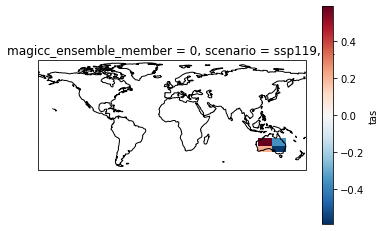

In [15]:
ax = (
    result_lat_lon_masked["tas"]
    .isel(scenario=0, year=0, realisation=0, magicc_ensemble_member=0)
    .plot(subplot_kws={"projection": ccrs.PlateCarree()})
)
ax.axes.coastlines()

Plot timeseries (Masked values with dashes, global-mean with solid lines).

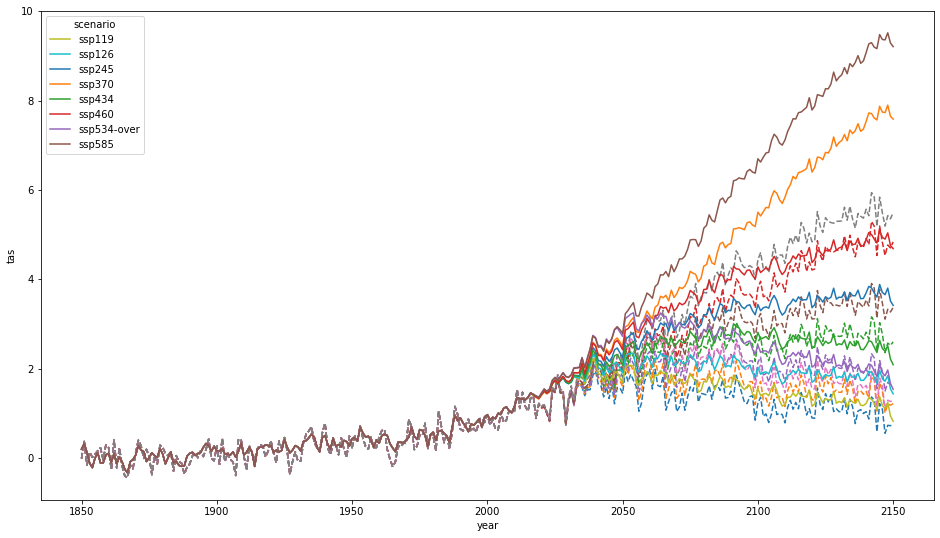

In [16]:
ax = plt.figure(figsize=(16, 9)).add_subplot(111)

for (source, add_legend, linestyle) in (
    (result_lat_lon_masked["tas"], False, "--"), 
    (result_lat_lon["tas"], True, "-")
):
    (
        source
        .weighted(weights)
        .mean(dim=["lat", "lon"])
        .median(dim=["realisation", "magicc_ensemble_member"])
        .plot
        .line(hue="scenario", x="year", linestyle=linestyle, ax=ax, add_legend=add_legend)
    )